# Visualizing statistical relationships

통계 분석은 데이터 집합의 변수가 서로 어떻게 관련되어 있는지, 그리고 이러한 관계가 다른 변수에 어떻게 의존하는지 이해하는 프로세스이다. 데이터를 제대로 시각화하면 인간의 시각 시스템이 관계를 나타내는 추세와 패턴을 볼 수 있기 때문에 시각화는 이 프로세스의 핵심 구성 요소가 될 수 있다.
<br/>
이 튜토리얼에서는 세 가지 seaborn 함수에 대해 설명한다. 가장 많이 사용할 함수는 relplot()이다. 이 함수는 분산형 차트와 라인 플롯이라는 두 가지 일반적인 접근 방식을 사용하여 통계적 관계를 시각화하는 함수이다. relplot()은 FacetGrid와 두 축 함수 중 하나를 결합한다.

* scatterplot() (with kind="scatter"; the default)

* lineplot() (with kind="line")
<br/>
앞으로 살펴보겠지만, 이러한 함수는 간단하고 이해하기 쉬운 데이터 표현을 사용하지만 복잡한 데이터 집합 구조를 나타낼 수 있기 때문에 매우 유용하다. 색조, 크기 및 스타일의 의미를 사용하여 최대 3개의 추가 변수를 매핑하여 향상시킬 수 있는 2차원 그래픽을 그리기 때문이다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

## Relating variables with scatter plots
분산형 차트는 통계 시각화의 주축이다. 산점도는 점의 구름을 사용하여 두 변수의 공동 분포를 나타내며, 각 점은 데이터 집합의 관측치를 나타낸다. 이 그림을 통해 두 변수 간에 의미 있는 관계가 있는지 여부에 대한 상당한 양의 정보를 추론할 수 있다
<br/><br/>
seaborn에서 산점도를 그리는 방법에는 여러 가지가 있다. 두 변수가 모두 숫자인 경우 사용해야 하는 가장 기본적인 방법은 scatterplot() 함수이다. 범주형 시각화 tutorial에서는 산점도를 사용하여 범주형 데이터를 시각화하는 특수 도구를 살펴본다. scatterplot()은 relplot()의 기본 종류이다(kind="scatter"를 설정하여 강제로 지정할 수도 있다)

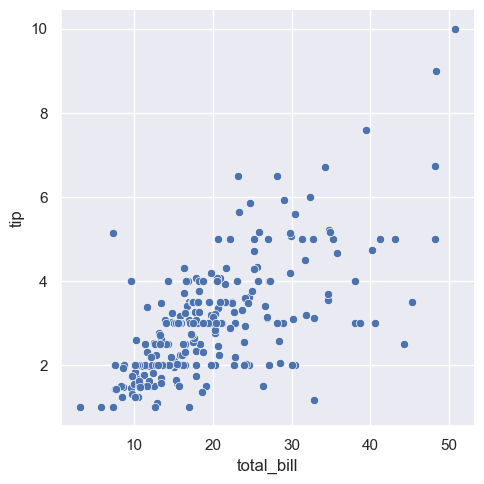

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(data=tips, x="total_bill", y="tip")

포인트가 2차원으로 그려지는 동안 세 번째 변수에 따라 포인트에 색상을 지정하여 다른 차원을 플롯에 추가할 수 있다. seaborn에서는 포인트의 색상에 의미를 부여하기 때문에 이를 'hue semantic'을 사용한다고 한다

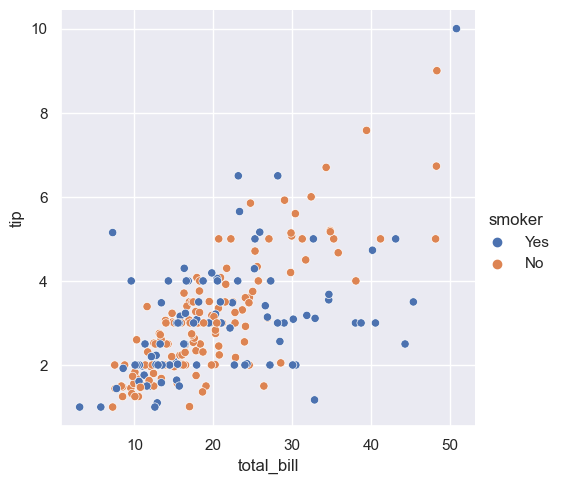

In [3]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")

class 간의 차이를 강조하고 접근성을 개선하기 위해 각 class에 다른 마커 스타일을 사용할 수 있다.

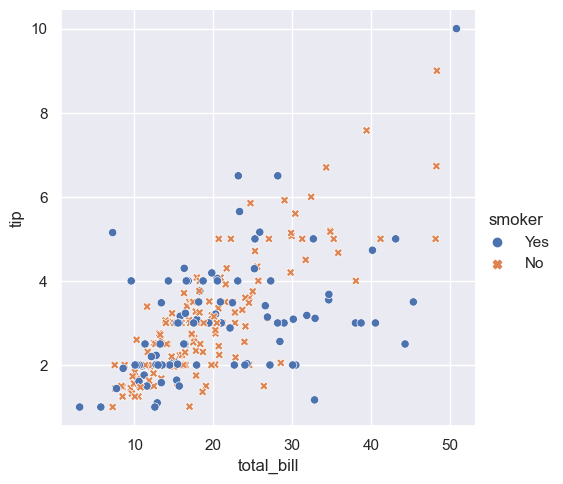

In [4]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="smoker"
)

각 포인트의 색조와 스타일을 독립적으로 변경하여 네 가지 변수를 표현할 수도 있다. 그러나 눈은 색상보다 모양에 훨씬 덜 민감하기 때문에 이 작업은 신중하게 수행해야 한다

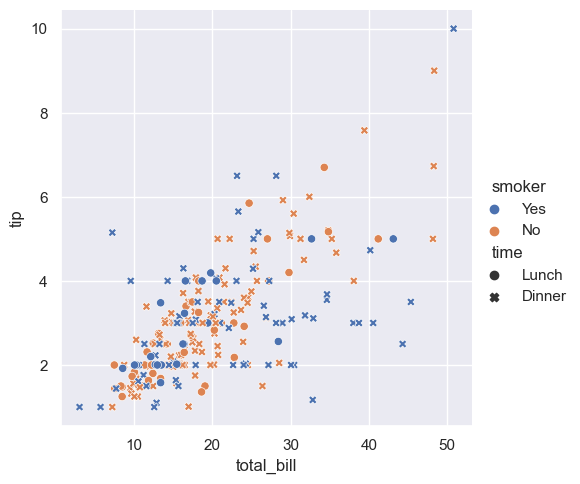

In [5]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="time",
)

위의 예에서는 hue semantic이 범주형이었으므로 기본 정성 팔레트가 적용되었다. hue semantic이 숫자인 경우(특히 플로트로 캐스팅할 수 있는 경우) 기본 색상은 순차 팔레트로 전환된다:

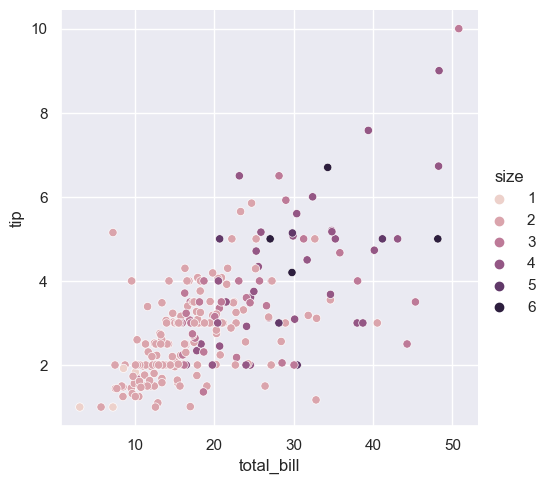

In [6]:
sns.relplot(
    data=tips, x="total_bill", y="tip", hue="size",
)

두 경우 모두 색상 팔레트를 사용자 지정할 수 있다. 이를 위한 다양한 옵션이 있다. 여기서는 문자열 인터페이스를 사용하여 cubehelix_palette()에 대한 순차 팔레트를 사용자 정의한다:

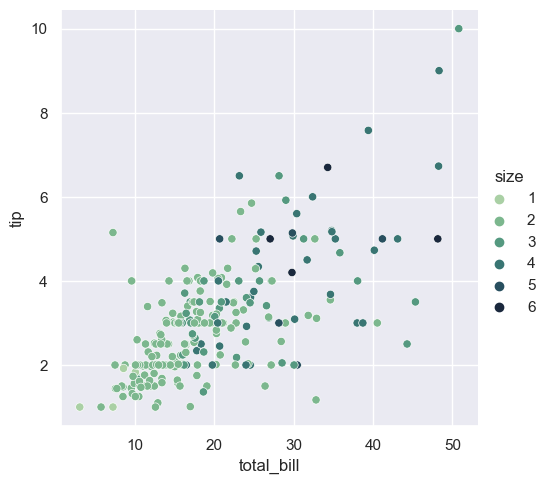

In [7]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    hue="size", palette="ch:r=-.5,l=.75"
)

세 번째 종류의 semantic variable는 각 점의 크기를 변경한다.

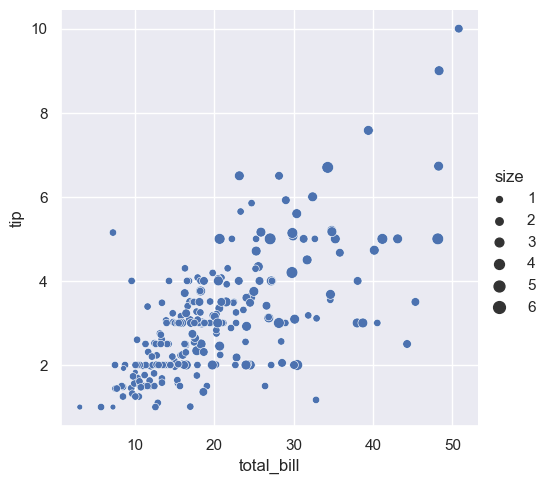

In [8]:
sns.relplot(data=tips, x="total_bill", y="tip", size="size")

matplotlib.pyplot.scatter()와 달리, 변수의 리터럴 값은 점의 면적을 선택하는 데 사용되지 않는다. 
대신 데이터 단위의 값 범위가 면적 단위의 범위로 정규화된다. 이 범위는 사용자 지정할 수 있다

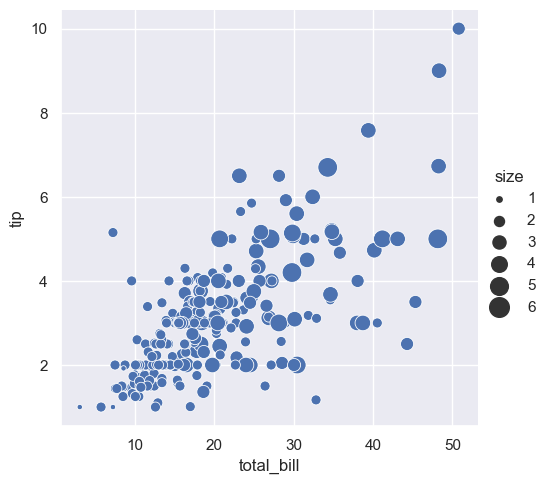

In [10]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size", sizes=(15, 200)
)

통계적 관계를 표시하기 위해 다양한 의미를 사용하는 방법을 사용자 정의하는 더 많은 예는 scatterplot() API 예제에 나와 있다.

## Emphasizing continuity with line plots
분산형 차트는 매우 효과적이지만, 보편적으로 최적의 시각화 유형은 없다. 대신, 시각적 표현은 데이터 집합의 세부 사항과 플롯으로 답을 구하려는 질문에 맞게 조정되어야 한다.

일부 데이터 집합의 경우, 한 변수의 변화를 시간의 함수 또는 유사한 연속형 변수로 이해하고 싶을 수 있다. 이러한 상황에서는 라인 플롯을 그리는 것이 좋다. seaborn에서는 lineplot() 함수를 직접 사용하거나 relplot()과 함께 kind="line"을 설정하여 이 작업을 수행할 수 있다

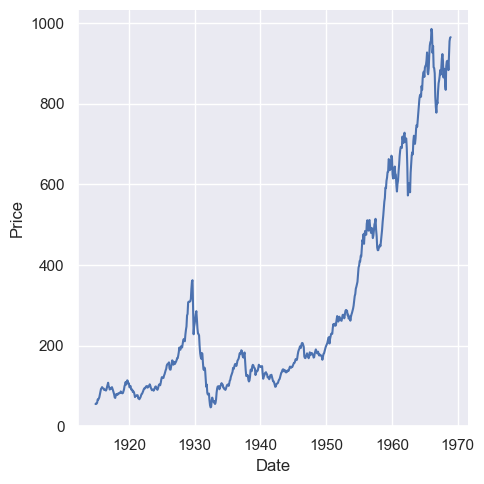

In [3]:
dowjones = sns.load_dataset("dowjones")
sns.relplot(data=dowjones, x="Date", y="Price", kind="line")

## Aggregation and representing uncertainty
더 복잡한 데이터 집합에는 동일한 x 변수 값에 대한 여러 측정값이 있다. <br/>
seaborn의 기본 동작은 평균과 평균 주위의 95% 신뢰 구간을 plotting하여 각 x 값에 대한 여러 측정값을 집계하는 것이다

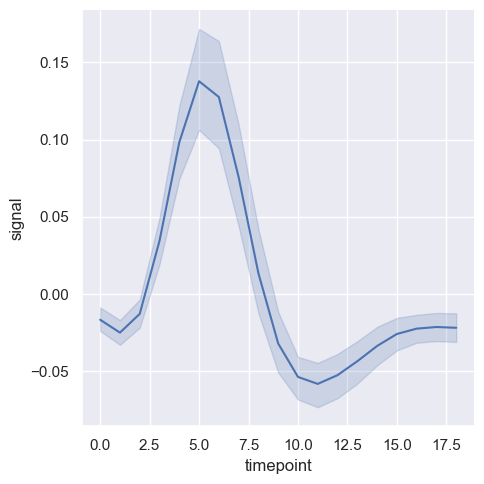

In [2]:
fmri = sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

신뢰 구간은 bootstrapping을 사용하여 계산되며, 대규모 데이터 세트의 경우 시간이 많이 소요될 수 있다. 따라서 이를 비활성화할 수 있다.

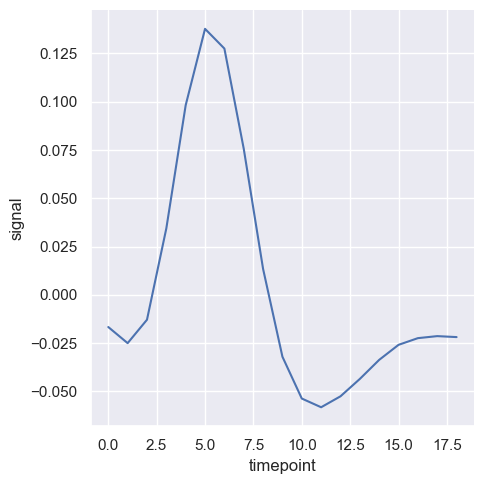

In [3]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar=None,
)

특히 데이터가 큰 경우 신뢰 구간 대신 표준 편차를 플롯하여 각 시점별 분포의 확산을 나타내는 것도 좋은 방법이다.

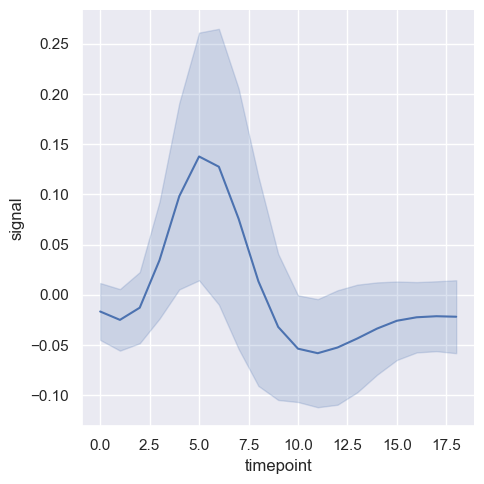

In [4]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar="sd",
)

집계를 모두 끄려면 추정기 매개 변수를 없음으로 설정한다. 데이터에 각 지점에 여러 관측값이 있는 경우 이상한 효과가 발생할 수 있다.

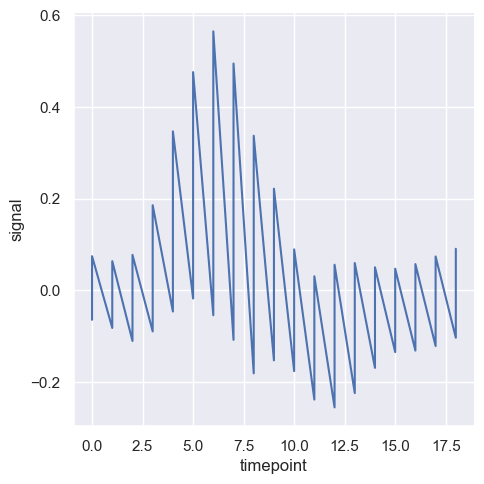

In [5]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    estimator=None,
)

## Plotting subsets of data with semantic mappings
lineplot() 함수는 플롯 요소의 색조, 크기, 스타일을 수정하여 최대 3개의 추가 변수를 표시할 수 있는 등 scatterplot()과 동일한 유연성을 가지고 있다. 이 함수는 scatterplot()과 동일한 API를 사용하므로, matplotlib에서 선과 점의 모양을 제어하는 매개변수에 대해 고민할 필요가 없다.

lineplot()에서 semantics을 사용하면 데이터가 집계되는 방식도 결된다. 예를 들어, 두 단계의 색조 semantics을 추가하면 플롯이 두 개의 선과 오차 구간으로 나뉘고, 각각에 색을 지정하여 해당 데이터의 하위 집합을 나타낸다.

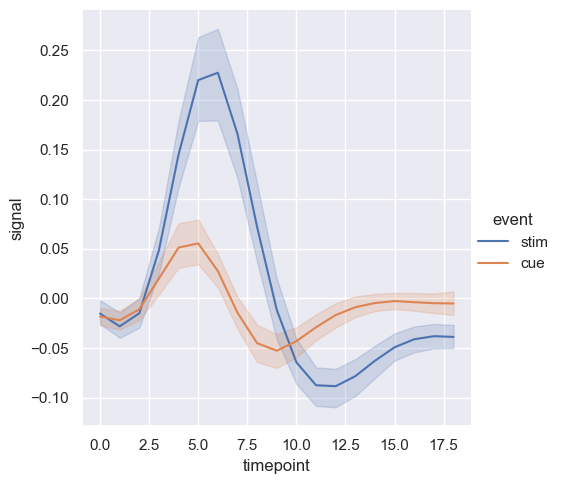

In [2]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event",
)

라인 플롯에 스타일 시맨틱을 추가하면 기본적으로 라인의 대시 패턴이 변경된다.

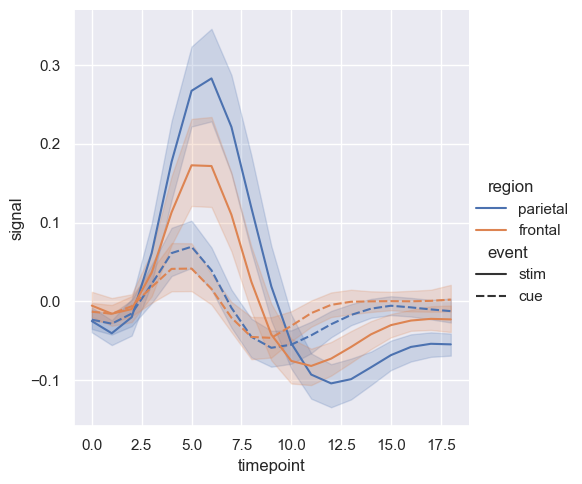

In [3]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event",
)

그러나 각 관찰에 사용된 마커를 대시와 함께 또는 대시 대신 사용하여 하위 집합을 식별할 수 있다

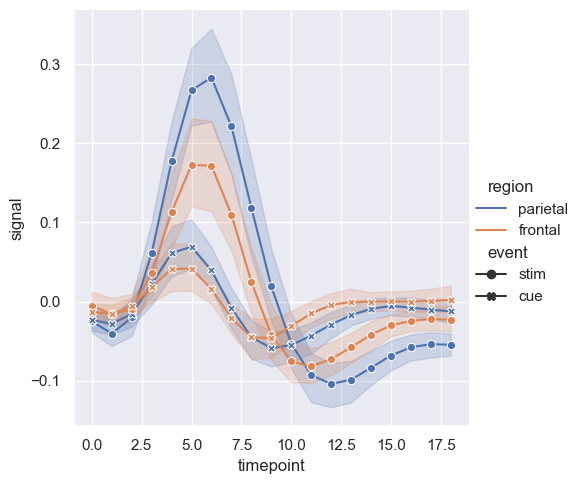

In [4]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
)

분산형 차트와 마찬가지로 여러 의미를 사용하여 라인 플롯을 만들 때는 주의해야 한다. 때로는 유익한 정보를 제공하기도 하지만, 구문 분석 및 해석이 어려울 수도 있다. 그러나 하나의 추가 변수에 대한 변화만 조사하는 경우에도 선의 색상과 스타일을 모두 변경하는 것이 유용할 수 있다. 이렇게 하면 흑백으로 인쇄하거나 색맹이 있는 사람이 볼 때 플롯에 더 쉽게 접근할 수 있다.

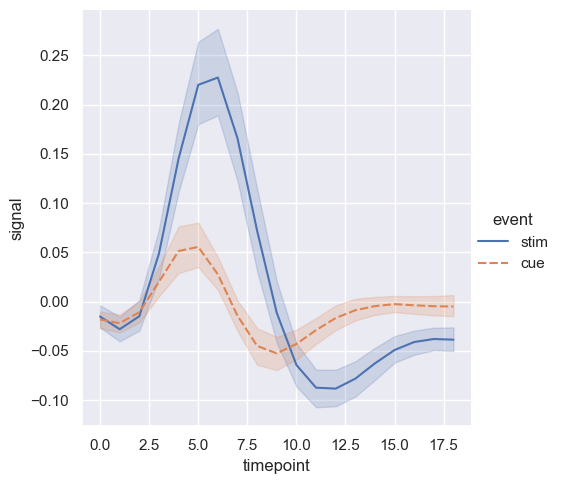

In [5]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event", style="event",
)

반복 측정값 데이터로 작업하는 경우(즉, 여러 번 샘플링된 단위가 있는 경우) 의미론을 통해 각 샘플링 단위를 구분하지 않고 개별적으로 플롯할 수도 있다. 이렇게 하면 범례가 복잡해지는 것을 방지할 수 있다.

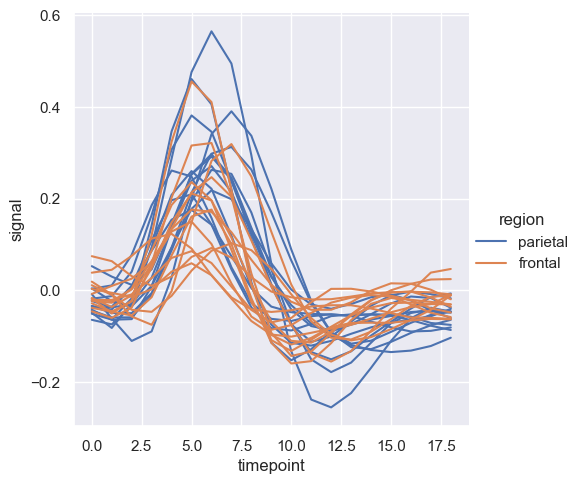

In [6]:
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,
)

라인플롯()의 기본 컬러맵과 범례 처리도 색조 시맨틱이 범주형인지 숫자형인지에 따라 달라진다.

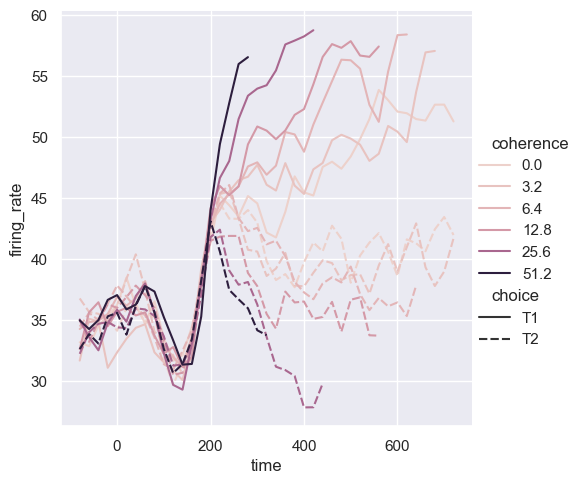

In [7]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
)

색조 변수가 숫자인데도 선형 색상 눈금으로 제대로 표현되지 않는 경우가 있을 수 있다. 여기서는 색조 변수의 레벨이 대수적으로 스케일링되어 있다. 목록이나 사전을 전달하여 각 줄에 특정 색상 값을 제공할 수 있다.

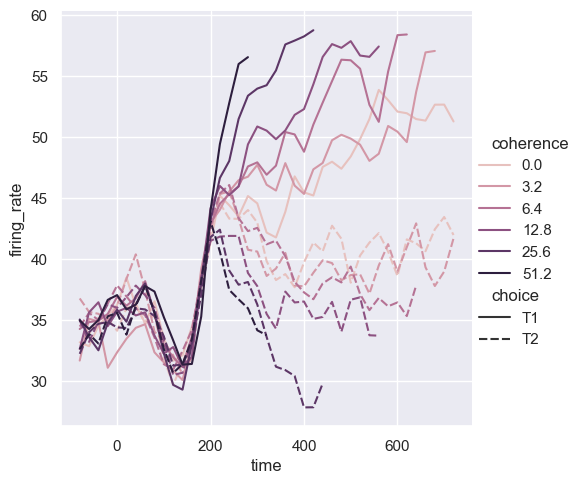

In [8]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice", palette=palette,
)

또는 컬러맵 정규화 방식을 변경할 수도 있다.

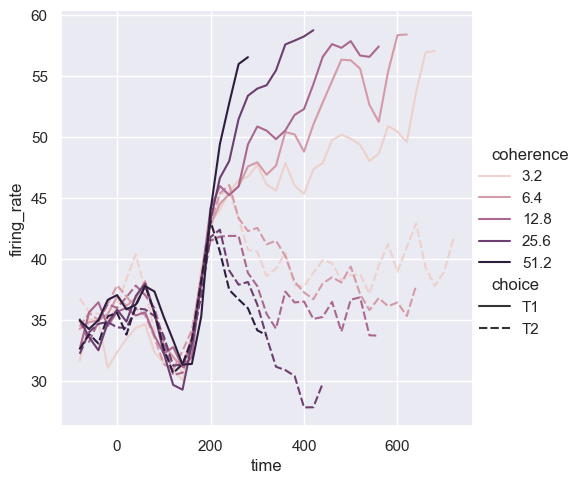

In [9]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(
    data=dots.query("coherence > 0"), kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
    hue_norm=LogNorm(),
)

세 번째 의미인 크기는 선의 너비를 변경한다.

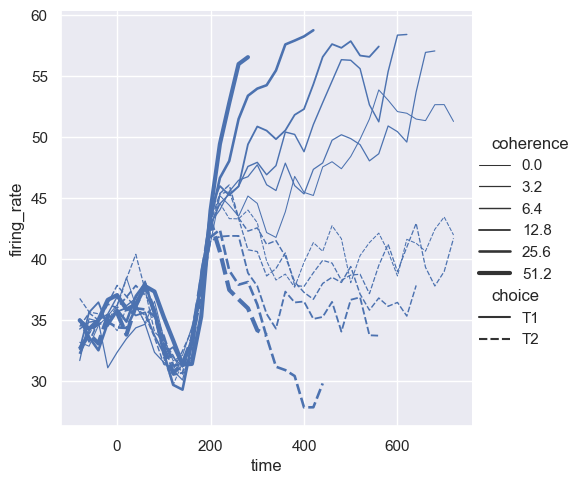

In [10]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    size="coherence", style="choice",
)

크기 변수는 일반적으로 숫자로 매핑되지만 선의 너비로 범주형 변수를 매핑할 수도 있다. 이 경우 '두꺼운' 선과 '얇은' 선을 구분하기 어렵기 때문에 주의해야 한다. 그러나 선의 빈도가 높은 변동성이 있는 경우 대시를 인식하기 어려울 수 있으므로 이러한 경우 다른 너비를 사용하는 것이 더 효과적일 수 있다.

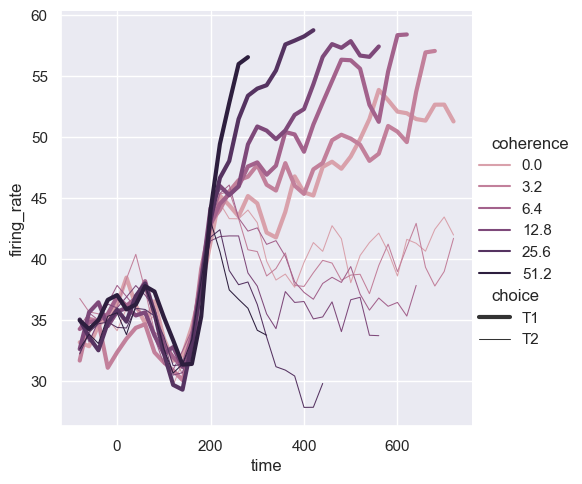

In [11]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", size="choice", palette=palette,
)